In [38]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist # de tinh khoang cach giua cac cap diem trong 2 tap hop
np.random.seed(11) # đảm bảo random nhưng sau mỗi lần chạy lại sẽ cho kết quả giống như ban đầu

In [65]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
# print(X0)
X1 = np.random.multivariate_normal(means[1], cov, N)
# print(X1)
X2 = np.random.multivariate_normal(means[2], cov, N)
# print(X2)
X = np.concatenate((X0, X1, X2), axis = 0)
print(X.shape)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T # mảng một chiều chứa phân bố cụm 
print(original_label.shape)



(1500, 2)
(1500,)


(500, 2)


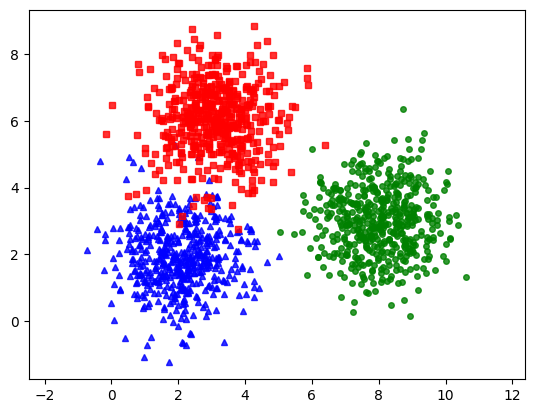

In [106]:
def kmeans_display(X, label):
    K = np.amax(label) + 1 # Số lượng cụm K bằng giá trị lớn nhất của mảng nhãn và tăng thêm 1
    X0 = X[label == 0, :] # Lấy các điểm dữ liệu thuộc cụm 0
    print(X0.shape)
    X1 = X[label == 1, :] # Lấy các điểm dữ liệu thuộc cụm 1
    X2 = X[label == 2, :] # Lấy các điểm dữ liệu thuộc cụm 2
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8) # Vẽ các điểm dữ liệu thuộc cụm 0 bằng ký hiệu tam giác màu xanh nước biển
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8) # Vẽ các điểm dữ liệu thuộc cụm 1 bằng ký hiệu chấm màu xanh lá cây
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8) # Vẽ các điểm dữ liệu thuộc cụm 2 bằng ký hiệu vuông màu đỏ

    plt.axis('equal') # Đảm bảo tỉ lệ trục x và trục y giống nhau để tránh bị méo dạng khi vẽ

    plt.plot() # Vẽ biểu đồ
    plt.show() # Hiển thị biểu đồ ra màn hình
kmeans_display(X,original_label)    


In [5]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [6]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


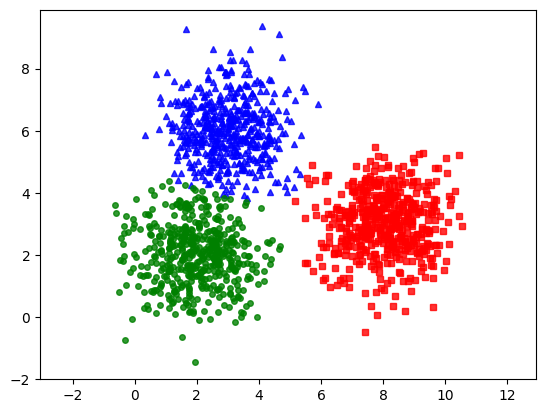

In [7]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])